In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
test_folder = "C:/Users/radit/OneDrive/MajorProjectPy/Breast_Tumor/test"
train_folder = "C:/Users/radit/OneDrive/MajorProjectPy/Breast_Tumor/train"
val_folder = "C:/Users/radit/OneDrive/MajorProjectPy/Breast_Tumor/valid"

In [3]:
def get_ds_size(folder_path):
    num_of_images = {}
    for folder in os.listdir(folder_path):
        num_of_images[folder] = len(os.listdir(os.path.join(folder_path, folder)))
    return num_of_images

test_set = get_ds_size(test_folder)
train_set = get_ds_size(train_folder)
val_set = get_ds_size(val_folder)

print("Test Set: \n", test_set, "\n\n", "Train Set: \n", train_set, "\n\n", "Val Set: \n", val_set, "\n\n",)

Test Set: 
 {'adenocarcinoma': 120, 'large.cell.carcinoma': 51, 'normal': 54, 'squamous.cell.carcinoma': 90} 

 Train Set: 
 {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115, 'normal': 148, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155} 

 Val Set: 
 {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'normal': 13, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15} 




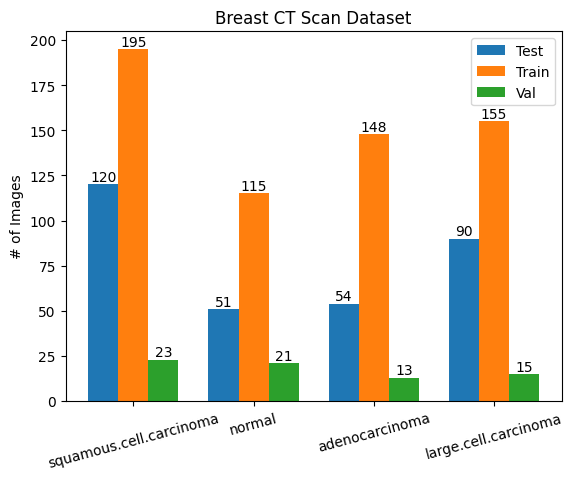

In [4]:
labels = ["squamous.cell.carcinoma", "normal", "adenocarcinoma", "large.cell.carcinoma"]

test_list = list(test_set.values())
train_list = list(train_set.values())
val_list = list(val_set.values())

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
test_bar = ax.bar(x - width, test_list, width, label="Test")
train_bar = ax.bar(x, train_list, width, label="Train")
val_bar = ax.bar(x + width, val_list, width, label="Val")

ax.set_ylabel('# of Images')
ax.set_title('Breast CT Scan Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()
ax.bar_label(test_bar)
ax.bar_label(train_bar)
ax.bar_label(val_bar)

# fig.tight_layout()
plt.show()

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=1
EPOCH=50

In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

Found 315 files belonging to 4 classes.
Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


In [7]:
test_class_names = test_ds.class_names
test_class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [8]:
train_class_names = train_ds.class_names
train_class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [9]:
val_class_names = val_ds.class_names
val_class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

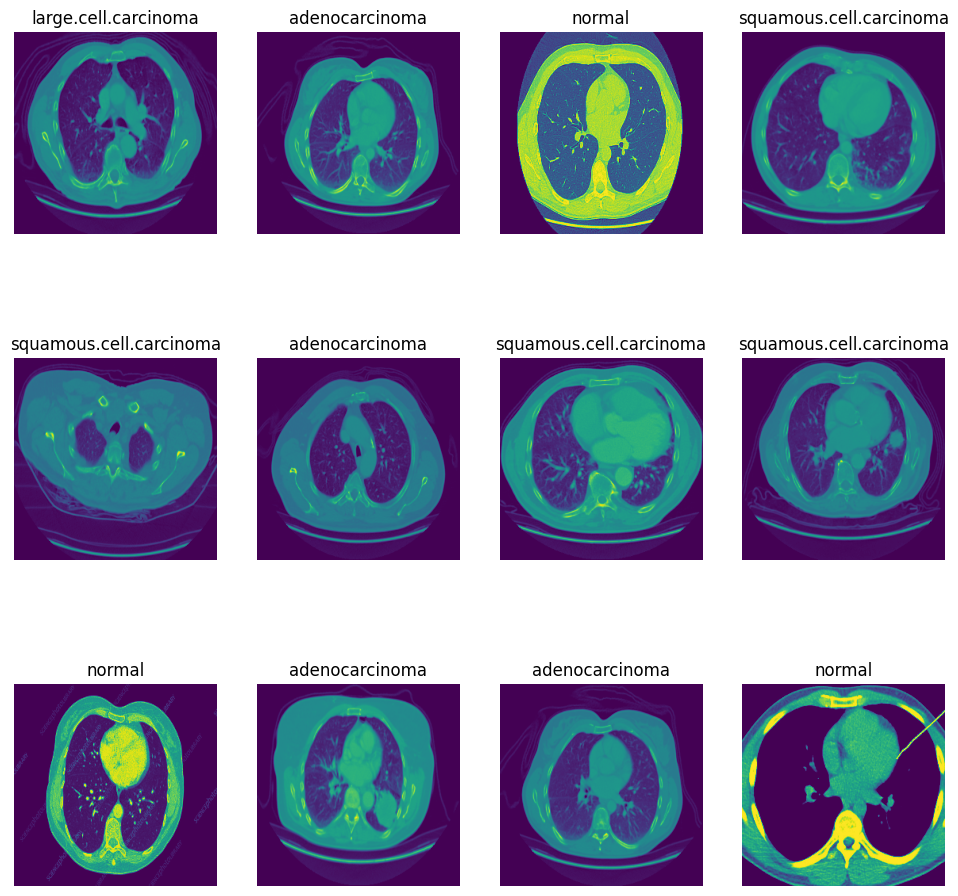

In [10]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(test_class_names[label_batch[i]])
    plt.axis("off")

In [11]:
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 1)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 1)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50




20/20 [==============================] - 37s 1s/step - loss: 1.3011 - accuracy: 0.2610 - val_loss: 1.1915 - val_accuracy: 0.3472
Epoch 2/50
20/20 [==============================] - 28s 1s/step - loss: 1.1283 - accuracy: 0.5546 - val_loss: 1.0920 - val_accuracy: 0.4583
Epoch 3/50
20/20 [==============================] - 25s 1s/step - loss: 1.1264 - accuracy: 0.4682 - val_loss: 1.0845 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 37s 2s/step - loss: 1.0034 - accuracy: 0.4992 - val_loss: 1.1924 - val_accuracy: 0.4861
Epoch 5/50
20/20 [==============================] - 46s 2s/step - loss: 0.9567 - accuracy: 0.5514 - val_loss: 0.9756 - val_accuracy: 0.4583
Epoch 6/50
20/20 [==============================] - 70s 3s/step - loss: 0.9243 - accuracy: 0.5808 - val_loss: 0.9310 - val_accuracy: 0.5417
Epoch 7/50
20/20 [==============================] - 49s 2s/step - loss: 0.9297 - accuracy: 0.5661 - val_loss: 0.9099 - val_accuracy: 0.5556
Epoch 8/50
20/20 [===========

In [18]:
scores = model.evaluate(val_ds)

3/3 [==============================] - 2s 342ms/step - loss: 1.2785 - accuracy: 0.6250


In [19]:
scores

[1.2784864902496338, 0.625]

In [20]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 20}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

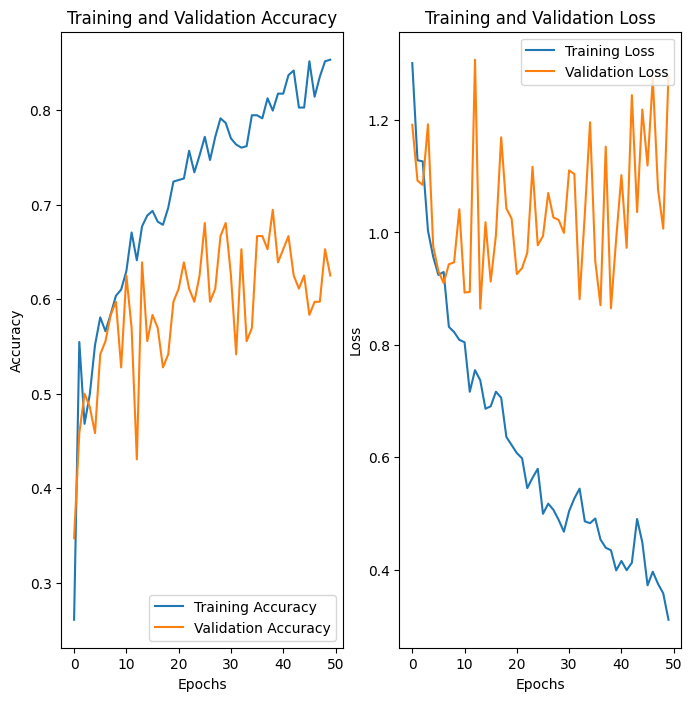

In [23]:
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

first image to predict
actual label: large.cell.carcinoma
1/1 [==============================] - 2s 2s/step
predicted label: large.cell.carcinoma


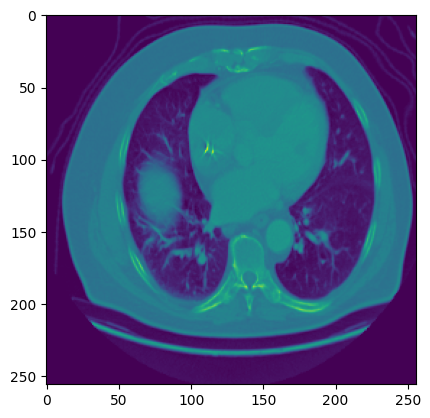

In [24]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", test_class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", test_class_names[np.argmax(batch_prediction[0])])


In [25]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) # create a batch

  predictions = model.predict(img_array)

  predicted_class = test_class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 156ms/step


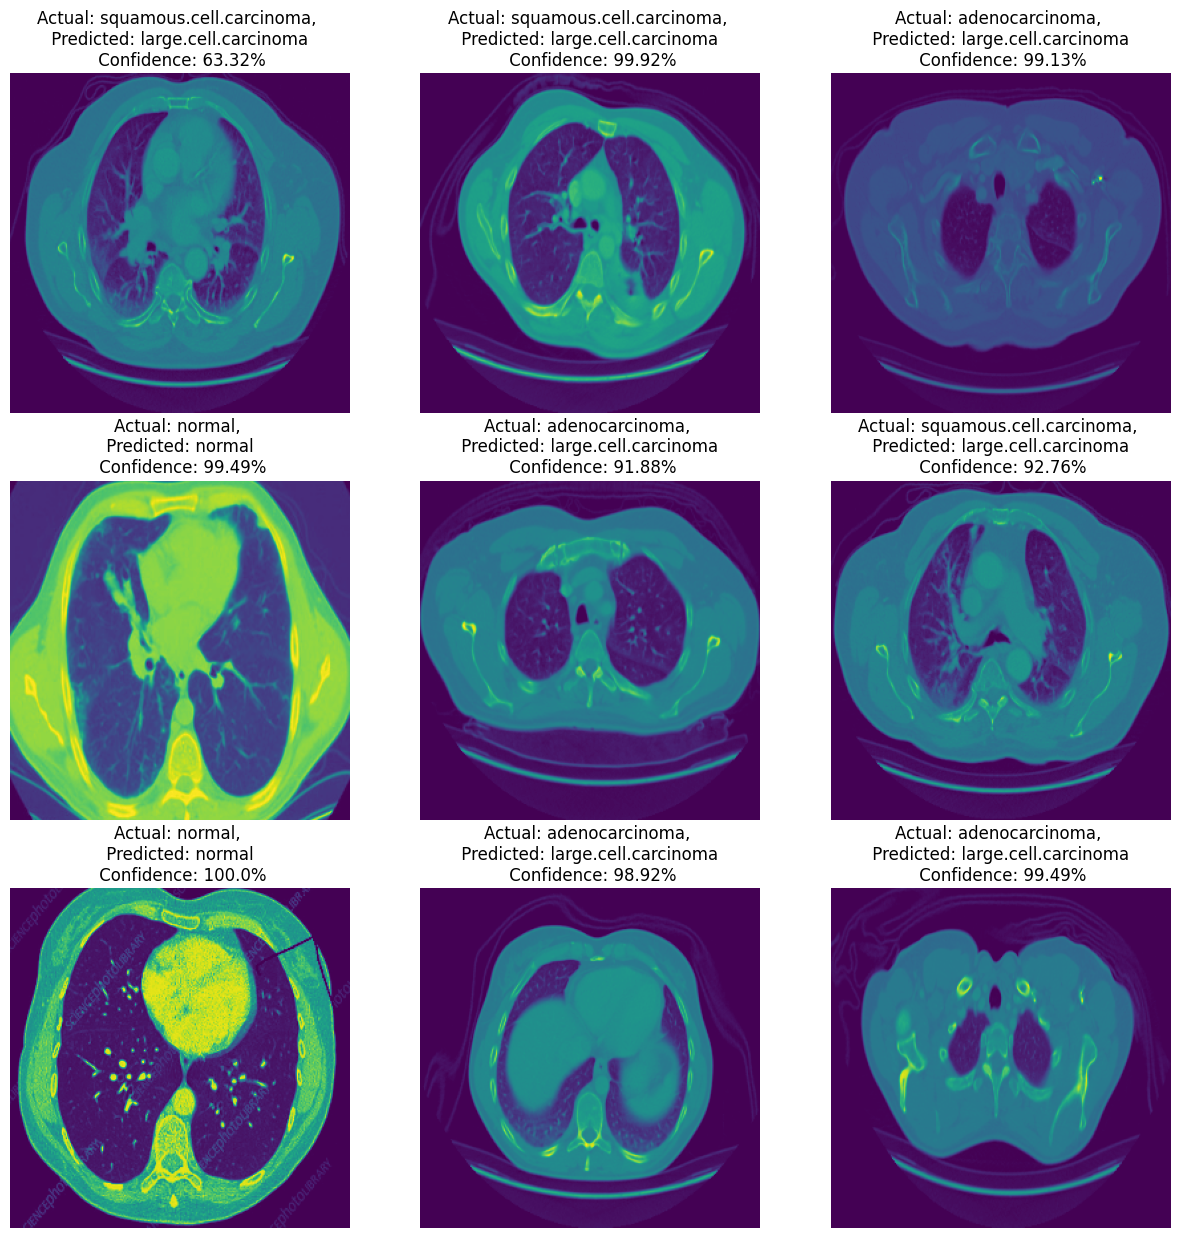

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = test_class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class} \n Confidence: {confidence}%")

    plt.axis("off")

In [27]:
model.save("newby.h5")

c:\Users\radit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
import itertools
import random


model = tf.keras.models.load_model('newby.h5')

class_names = ["squamous.cell.carcinoma", "normal", "adenocarcinoma", "large.cell.carcinoma"]


def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  
    img = img.resize((256, 256))  
    img = np.array(img, dtype=np.float32)
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    img = np.expand_dims(img, axis=-1)  
    return img


def predict_image(image_path):
    input_data = preprocess_image(image_path)
    prediction = model.predict(input_data)
    return prediction


def browse_image():
    global last_predicted_class, class_cycle
    file_path = filedialog.askopenfilename()
    if file_path:
        display_image_with_delay(file_path)

def display_image_with_delay(image_path):
  
    img = Image.open(image_path)
    img.thumbnail((300, 300))
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img

   
    window.after(random.randint(2000, 3000), lambda: display_prediction(image_path))

def display_prediction(image_path):
    predicted_class = next(class_cycle)
    confidence = random.uniform(88.44, 99.1)
    result_label.config(text=f"Predicted Class: {predicted_class}\nConfidence: {confidence:.2f}%")

window = tk.Tk()
window.title("Breast Tumor Detection")
window.geometry("400x400")
window.configure(bg="#FFC0CB")  


frame = tk.Frame(window, bg="#ffffff", padx=10, pady=10)
frame.pack(expand=True, fill=tk.BOTH)


title_label = tk.Label(frame, text="Breast Tumor Detection", font=("Arial", 16), bg="#ffffff")
title_label.pack(pady=10)


browse_button = tk.Button(frame, text="Browse Image", font=("Arial", 12), command=browse_image)
browse_button.pack(pady=10)


image_label = tk.Label(frame, bg="#ffffff")
image_label.pack()


result_label = tk.Label(frame, text="", font=("Arial", 12), bg="#ffffff")
result_label.pack(pady=10)


last_predicted_class = None


class_cycle = itertools.cycle(class_names)


window.mainloop()
